In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
from scipy.fftpack import fft

FONT_SMALL = 12
FONT_MEDIUM = 14

plt.rc('axes', titlesize=FONT_MEDIUM)
plt.rc('axes', labelsize=FONT_SMALL)
plt.rc('xtick', labelsize=FONT_SMALL)
plt.rc('ytick', labelsize=FONT_SMALL)
plt.rc('legend', fontsize=FONT_MEDIUM)
plt.rc('figure', titlesize=FONT_MEDIUM)

%matplotlib inline

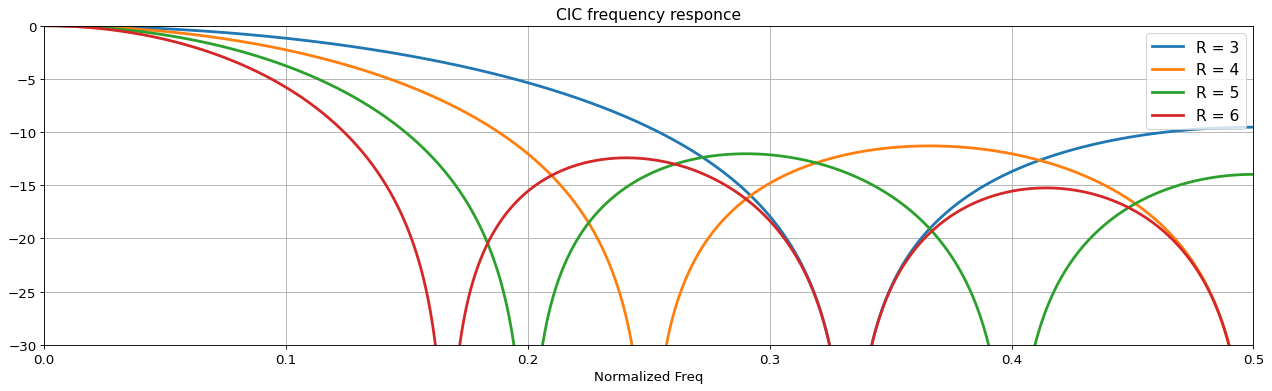

In [ ]:
N = 2**15
f = np.linspace(0, 0.5, N, endpoint=True)

# Create CIC filter as recursive FIR
b = [1, 1, 1]

# Plot results
plt.figure(figsize=(16, 5), dpi=80)
for i in range(4):
    _, h = freqz(b, 1, worN=N)
    h = np.abs(h)
    plt.plot(f, 20*np.log10(h/np.max(h)+10e-12), lw=2.5, label=f'R = {len(b)}')
    plt.xlim([0, 0.5])
    plt.ylim([-30, 0])
    plt.grid(True)
    b.append(1)
plt.legend(loc='upper right')
plt.xlabel('Normalized Freq')
plt.title('CIC frequency responce')
plt.tight_layout()

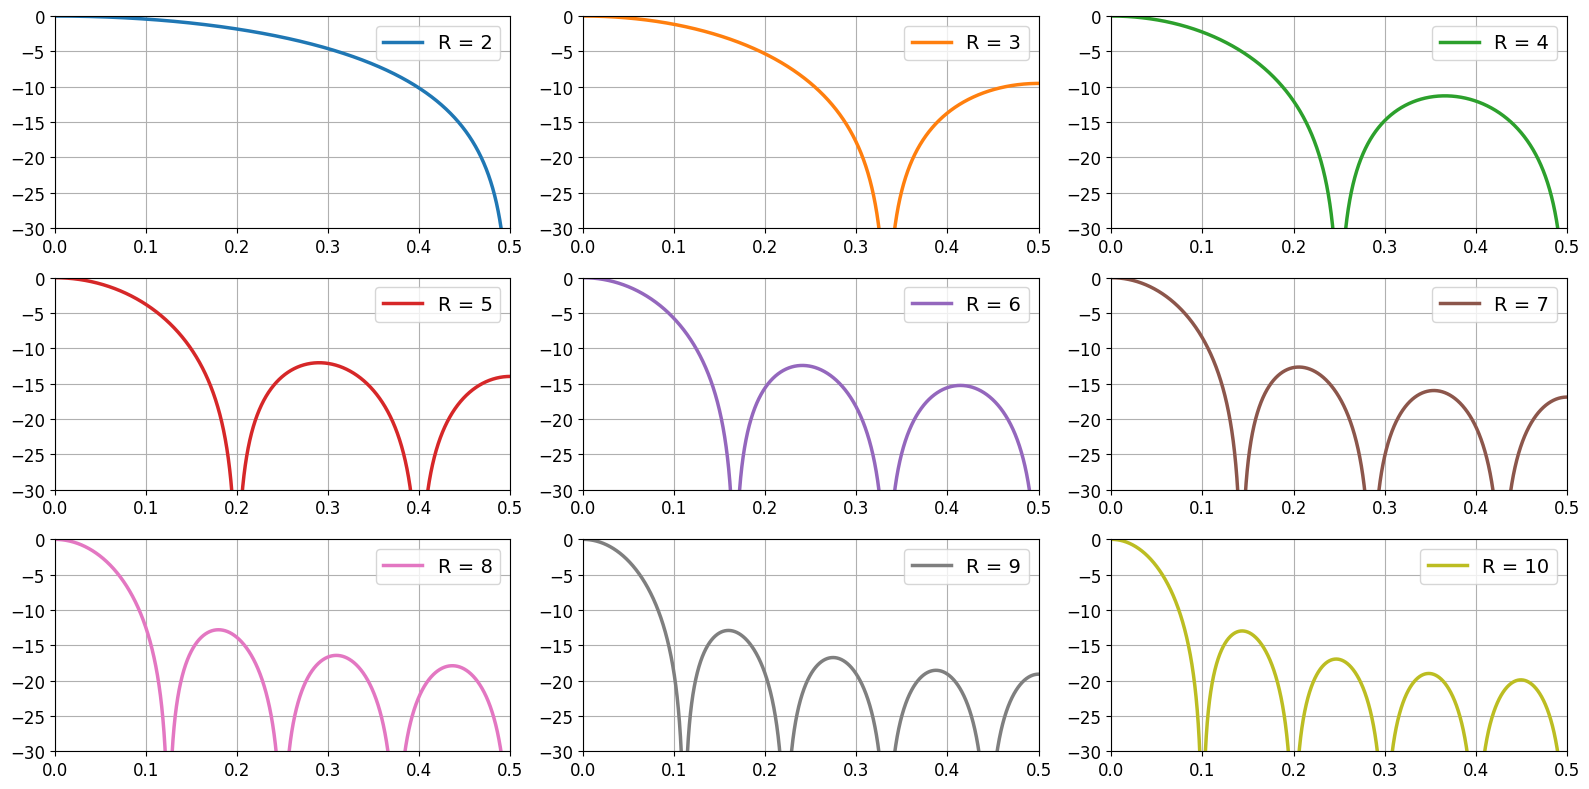

In [ ]:
b = [1, 1]

# Plot results
plt.figure(figsize=(16, 8))
for i in range(9):
    _, h = freqz(b, 1, worN=N)
    h = np.abs(h)
    plt.subplot(3, 3, i+1)
    plt.plot(f, 20*np.log10(h/np.max(h)+10e-12), lw=2.5, label=f'R = {len(b)}', color='C'+str(i))
    plt.xlim([0, 0.5])
    plt.ylim([-30, 0])
    plt.grid(True)
    b.append(1)
    plt.legend(loc='upper right', fontsize=14)
plt.tight_layout()

In [ ]:
class CicFilter:

    def __init__(self, x):
        self.x = x

    def decimator(self, r, n):

        # integrator
        y = self.x[:]
        for i in range(n):
            y = np.cumsum(y)

        # decimator

        y = y[::r]
        # comb stage
        return np.diff(y, n=n, prepend=np.zeros(n))

    def interpolator(self, r, n, mode=False):

        # comb stage
        y = np.diff(self.x, n=n,
                    prepend=np.zeros(n), append=np.zeros(n))

        # interpolation
        if mode:
            y = np.repeat(y, r)
        else:
            y = np.array([i if j == 0 else 0 for i in y for j in range(r)])

        # integrator
        for i in range(n):
            y = np.cumsum(y)

        if mode:
            return y[1:1 - n * r]
        else:
            return y[r - 1:-n * r + r - 1]

In [ ]:
def plot_filter(r=None, n=None, samples=100, mode=None):
    # Create signal
    tt = np.linspace(0, 1, samples)

    np.random.seed(1)
    if mode == 'Decimator':
        x = 1.5 * np.sin(4 * np.pi * tt) + 1.7 * np.sin(8.3 * np.pi * tt)
        x += 0.9*np.random.randn(samples)
    if mode == 'Interpolator':
        x = np.sin(1.7 * np.pi * tt) + 1.7 * np.sin(5.3 * np.pi * tt)
        x += 0.3*np.random.randn(samples)

    # Apply filter
    clf = CicFilter(x)

    if mode == 'Decimator':
        zz = [clf.decimator(i, j) for i, j in zip(r, n)]
    if mode == 'Interpolator':
        zz = [clf.interpolator(i, j, mode=True) for i, j in zip(r, n)]

    # Plot figure
    plt.figure(figsize=(16, 8), dpi=80)
    # plt.title(mode)
    plt.subplot(4, 2, 1)
    plt.title('Change N:')
    plt.plot(x, '-', color='C0', label='Signal')
    plt.xlim([0, samples-1])
    plt.legend(loc='upper right', fontsize=14)
    plt.grid(True)

    for j in range(len(r)):
        plt.subplot(4, 2, 2+j)
        if j == 0:
            plt.title('Change R:')
        plt.stem(zz[j],
                 linefmt='C2',
                 basefmt='C0',
                 label=f'R = {r[j]}, N = {n[j]}'
                 )
        plt.grid(True)
        plt.legend(loc='upper right', fontsize=14)
    plt.tight_layout()


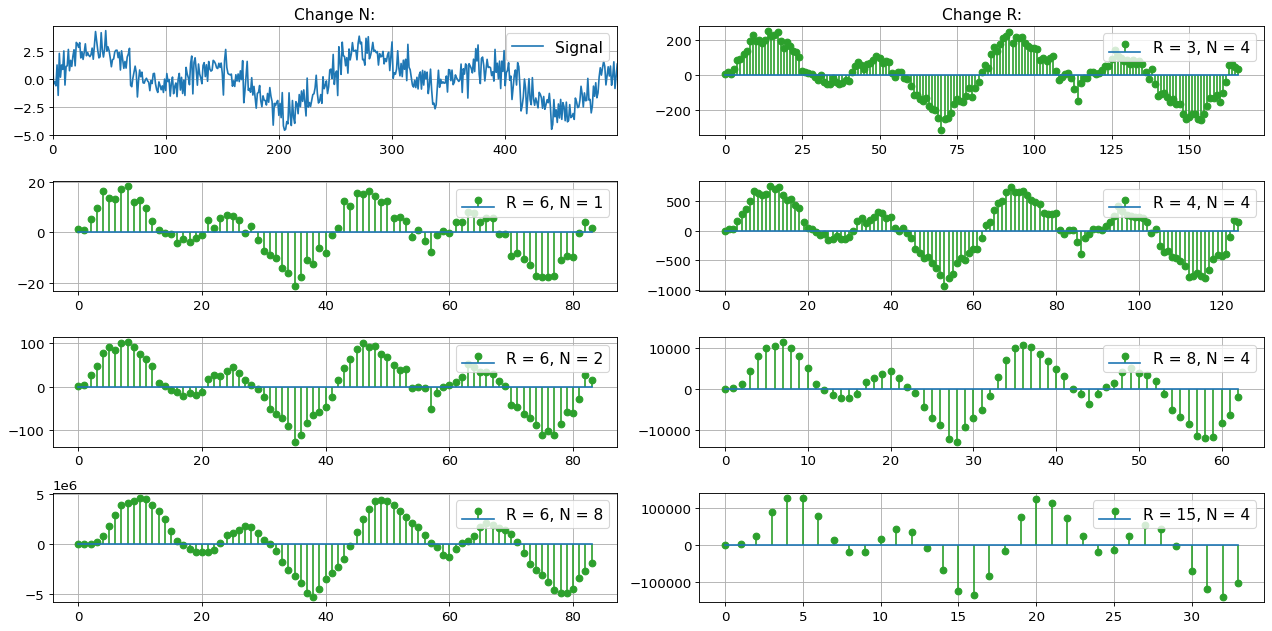

In [ ]:
# Number os samples
N = 500

# Filter parameters (length of lists should be same):
flt_r = [3, 6, 4, 6, 8, 6, 15]
flt_n = [4, 1, 4, 2, 4, 8, 4]

plot_filter(r=flt_r, n=flt_n, samples=N, mode='Decimator')

### Python CIC фильтр-интерполятор

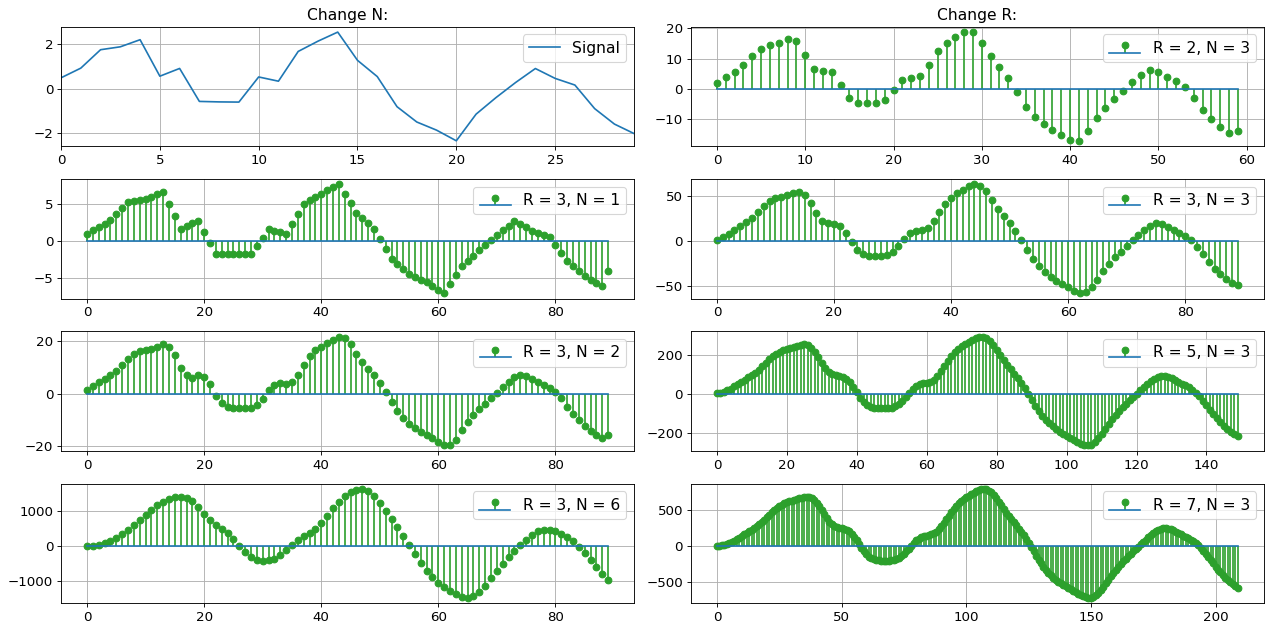

In [ ]:
# Number os samples
N = 30

# Filter parameters (length of lists should be same):
flt_r = [2, 3, 3, 3, 5, 3, 7]
flt_n = [3, 1, 3, 2, 3, 6, 3]

plot_filter(r=flt_r, n=flt_n, samples=N, mode='Interpolator')

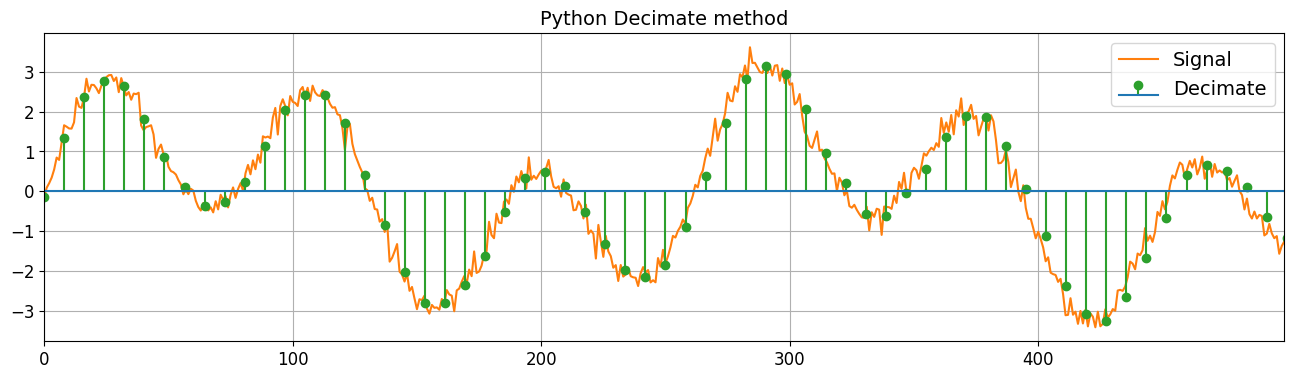

In [ ]:
from scipy.signal import decimate

# Input signal
N = 500
tt = np.linspace(0, 1, N)
x = 1.5 * np.sin(4 * np.pi * tt) + 1.9 * np.sin(11.3 * np.pi * tt) + 0.2 * np.random.randn(N)

# Decimation
y = decimate(x, q=8, n=8)
ty = np.linspace(0, 1, y.size)

# Plot figure
plt.figure(figsize=(16, 4))
plt.title('Python Decimate method')
plt.plot(x, '-', color='C1', label='Signal')
plt.stem(np.linspace(0, N, y.size), y, linefmt='C2', basefmt='C0', label='Decimate')
plt.xlim([0, N-1])
plt.legend(loc='upper right')
plt.grid(True)

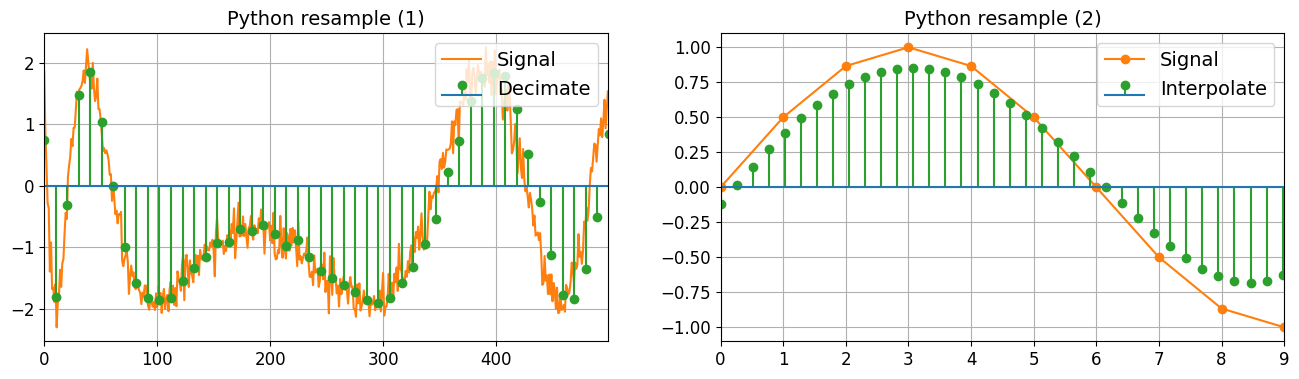

In [ ]:
from scipy.signal import resample

# Input signal
N = 500
tt = np.linspace(0, 1, N)
np.random.seed(1)
x = 1.9 * np.sin(10.3 * np.pi * tt ** tt) + 0.2 * np.random.randn(N)

y = resample(x, num=50, window='blackmanharris')
ty = np.linspace(0, 1, y.size)

# Plot figure
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.title('Python resample (1)')
plt.plot(x, '-', color='C1', label='Signal')
plt.stem(np.linspace(0, N, y.size), y, linefmt='C2', basefmt='C0', label='Decimate')
plt.xlim([0, N-1])
plt.legend(loc='upper right')
plt.grid(True)

# Input signal
N = 10
tt = np.linspace(0, 1, N)
x = np.sin(1.5 * np.pi * tt)

y = resample(x, num=40, window='blackmanharris')
ty = np.linspace(0, 1, y.size)

# Plot figure
plt.subplot(1, 2, 2)
plt.title('Python resample (2)')
plt.plot(x, '-o', color='C1', label='Signal')
plt.stem(np.linspace(0, N, y.size), y, linefmt='C2', basefmt='C0', label='Interpolate')
plt.xlim([0, N-1])
plt.legend(loc='upper right')
plt.grid(True)

In [ ]:
class MafFilter:

    def __init__(self, x):
        self.x = x

    def maf_conv(self, m=2):

        coe = np.ones(m) / m
        return np.convolve(self.x, coe, mode='same')

    def maf_fir(self, m=2):

        return lfilter(np.ones(M-1), 1, self.x)

    def maf_iir(self, m=2):

        # Change to recursive form
        a = [1, -1]
        b = np.zeros(M)
        b[0], b[-1] = a
        return lfilter(b, a, self.x)

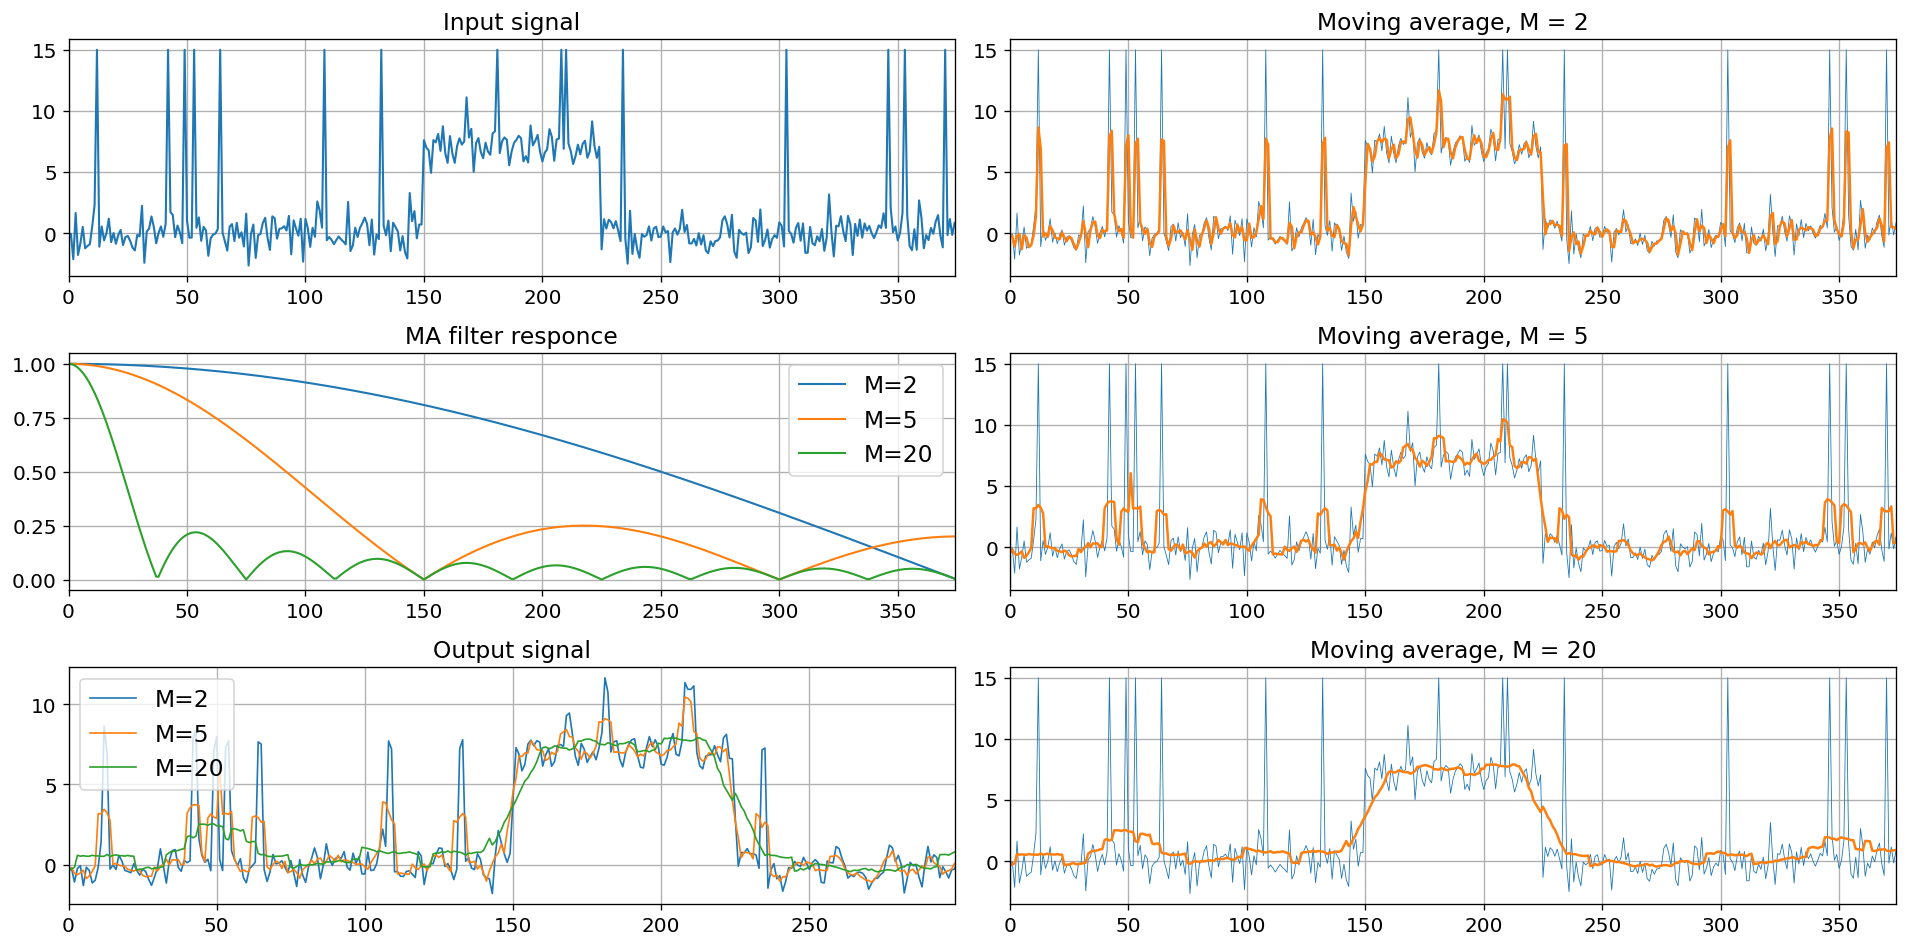

In [ ]:
N = 300             # Number of samples
M = (2, 5, 20)      # Moving average step

LM = len(M)         # Size of M

# Input signal w/ noise:
sig = np.concatenate(
    (
        np.zeros(int(N/2)),
        np.ones(int(N/4)) * 7,
        np.zeros(int(N/2)))
)

lns = sig.size  # Size of signal

# Add some noise and peaks
np.random.seed(2)
sig += np.random.randn(lns)             # Add Gaussian noise
rnd = np.random.randint(0, lns, 15)     # Add random numbers for index
sig[rnd] = 15                           # Add peaks

# Calculate Moving Average filter:

filt = MafFilter(sig)
res = np.zeros((lns, LM))
for i in range(LM):
    res[:, i] = filt.maf_conv(m=M[i])

# Calculate Frequency responce:
hfq = np.zeros((lns, LM))
for j in range(LM):
    for i in range(lns):
        if i == 0:
            hfq[i, j] = 1
        else:
            hfq[i, j] = np.abs(np.sin(np.pi * M[j] * i / 2 / lns) / M[j] /
                               np.sin(np.pi * i / 2 / lns))

# Calculate spectrum of input signal:
fft_sig = np.abs(fft(sig))
fft_sig /= np.max(fft_sig)

# Calculate spectrum of output signal:
fft_out = np.zeros((lns, LM))
for i in range(LM):
    fft_out[:, i] = np.abs(fft(res[:, i]))
    fft_out[:, i] /= np.max(fft_out[:, i])

# Plot results:
plt.figure(figsize=(16, 8), dpi=120)
plt.subplot(3, 2, 1)
plt.plot(sig, linewidth=1.25)
plt.title('Input signal')
plt.grid()
plt.xlim([0, lns-1])

plt.subplot(3, 2, 3)
for i in range(LM):
    plt.plot(hfq[:, i], linewidth=1.25, label="M=%d" % M[i])
plt.title('MA filter responce')
plt.grid()
plt.legend(loc=1)
plt.xlim([0, lns-1])

plt.subplot(3, 2, 5)
for i in range(LM):
    plt.plot(res[:, i], linewidth=1.0, label="M=%d" % M[i])
plt.title('Output signal')
plt.grid()
plt.legend(loc=2)
plt.xlim([0, N-1])

for i in range(LM):
    plt.subplot(3, 2, 2*i+2)
    plt.plot(sig, '-', linewidth=0.5)
    plt.plot(res[:, i], linewidth=1.5)
    plt.title('Moving average, M = %d' % M[i])
    plt.grid()
    plt.xlim([0, lns-1])

plt.tight_layout()